In [1]:
import os
from functools import partial 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import auc
from scipy.stats import spearmanr
from matplotlib_venn import venn3
import secstructartist as ssa
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.ensemble

# file with functions used to plot figures
from plotting_funcs import *

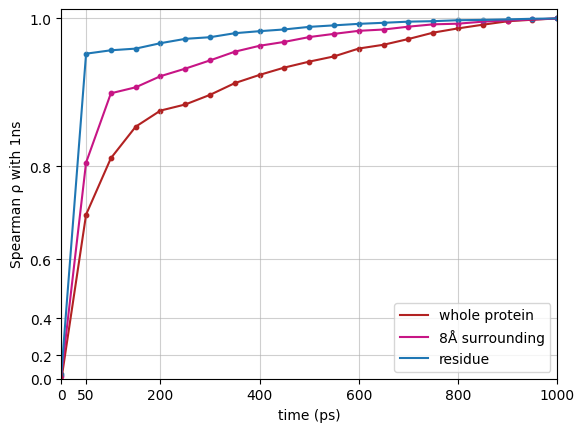

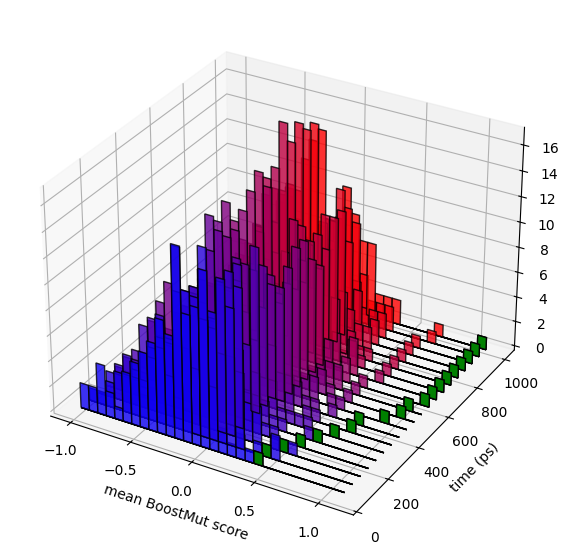

In [2]:
# figure 2: plot spearman and 3d histogram for long LEH data

# load in data for long LEH runs
data_leh_long_p = pd.read_csv('./data/leh_data_long_protein.csv',index_col=0)
data_leh_long_s = pd.read_csv('./data/leh_data_long_surrounding.csv',index_col=0)
data_leh_long_r = pd.read_csv('./data/leh_data_long_residue.csv',index_col=0)
data_leh_long_total = pd.read_csv('./data/leh_data_long_total.csv',index_col=0)

plot_spearman([data_leh_long_p.values, data_leh_long_s.values, data_leh_long_r.values],
               name_out='./figures/fig_2_leh_long_spearman.png')
plot_3dhist(data_leh_long_total, highlight=['N92K'], name_out='./figures/fig_2-leh_long_3dhist.png')


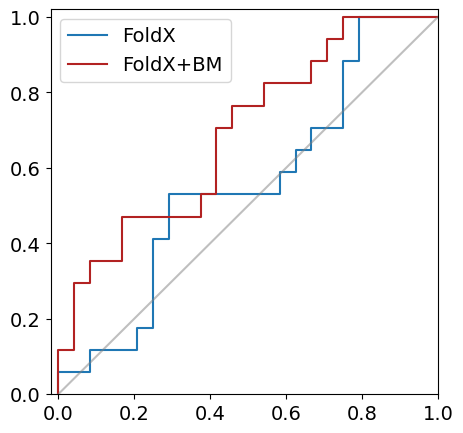

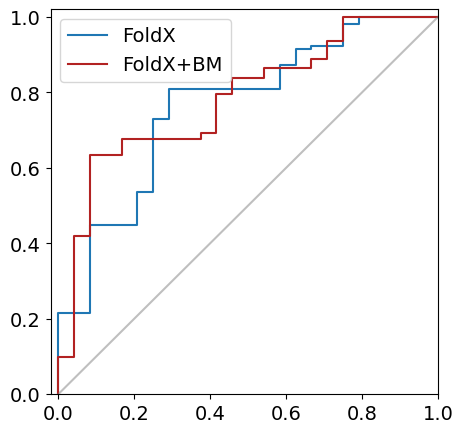

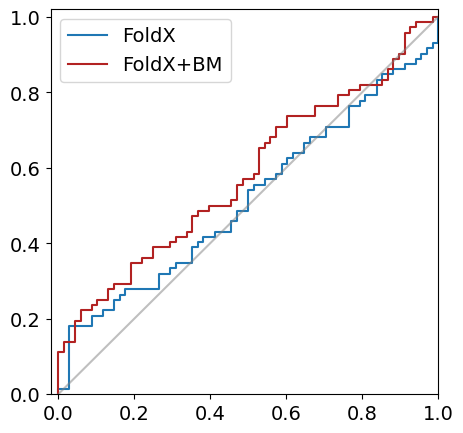

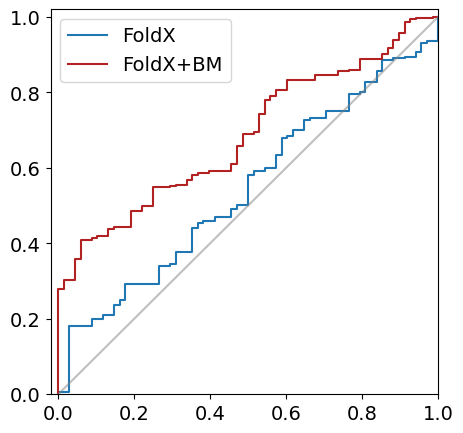

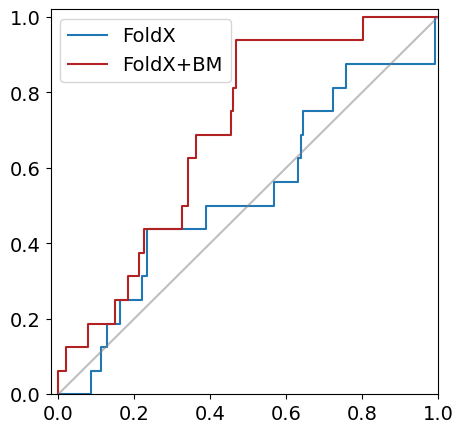

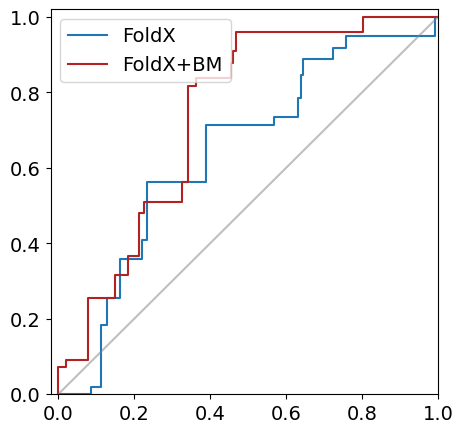

[0.55 0.52 0.53]
[0.69 0.58 0.69]


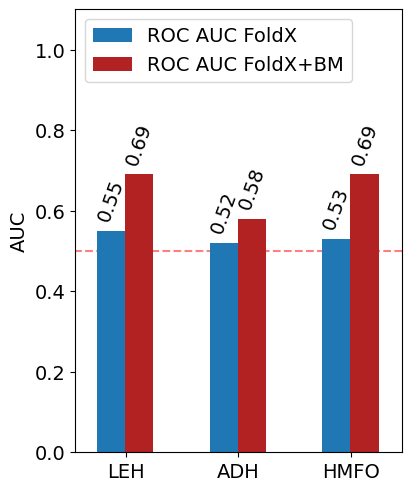

[0.76 0.54 0.64]
[0.78 0.68 0.74]


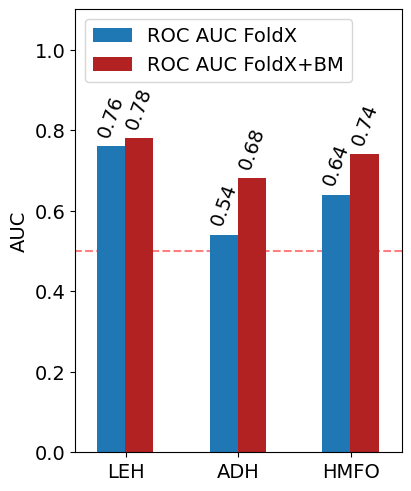

In [3]:
# figure 3: ROC curves and weighted ROC curves for FRESCO data

# load in data for FRESCO proteins
leh_data = pd.read_csv('./data/leh_data.csv', index_col=0)
adh_data = pd.read_csv('./data/adh_data.csv', index_col=0)
hmfo_data = pd.read_csv('./data/hmfo_data.csv', index_col=0)

# make (W)ROC cuves and calculate (W)AUC
aucs_leh = plot_roc(leh_data, name_out='./figures/fig_3-ROC-leh.png')
waucs_leh = plot_roc(leh_data, scale=True, name_out='./figures/fig_3-WROC-leh.png')

aucs_adh = plot_roc(adh_data, name_out='./figures/fig_3-ROC-adh.png')
waucs_adh = plot_roc(adh_data, scale=True, name_out='./figures/fig_3-WROC-adh.png')

aucs_hmfo = plot_roc(hmfo_data, name_out='./figures/fig_3-ROC-hmfo.png')
waucs_hmfo = plot_roc(hmfo_data, scale=True, name_out='./figures/fig_3-WROC-hmfo.png')

# make barplot of (W)AUC values
species = ['LEH', 'ADH', 'HMFO']
values_auc = {
    'ROC AUC FoldX': np.round([aucs_leh[0], aucs_adh[0], aucs_hmfo[0]], 2),
    'ROC AUC FoldX+BM': np.round([aucs_leh[1], aucs_adh[1], aucs_hmfo[1]], 2)}
values_wauc = {
    'ROC AUC FoldX': np.round([waucs_leh[0], waucs_adh[0], waucs_hmfo[0]], 2),
    'ROC AUC FoldX+BM': np.round([waucs_leh[1], waucs_adh[1], waucs_hmfo[1]], 2)}
colors = {'ROC AUC FoldX':'tab:blue', 'ROC AUC FoldX+BM':'firebrick'}

plot_bars(values_auc, species, colors, headspace=0.1, name_out='./figures/fig_3-bars-AUC.png')
plot_bars(values_wauc, species, colors, headspace=0.1, name_out='./figures/fig_3-bars-WAUC.png')

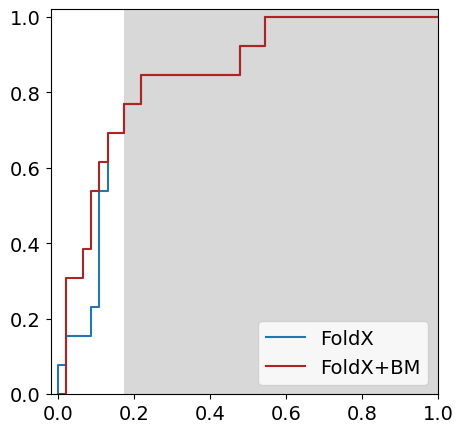

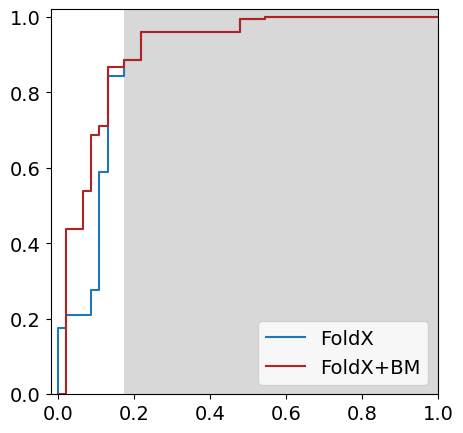

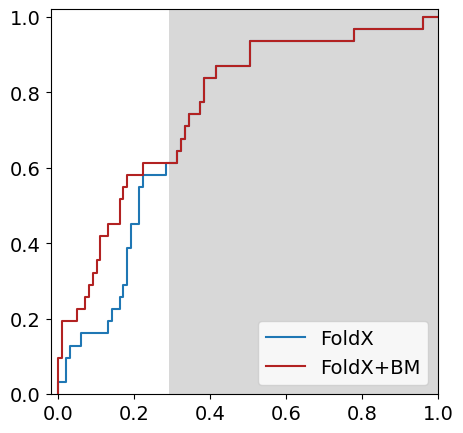

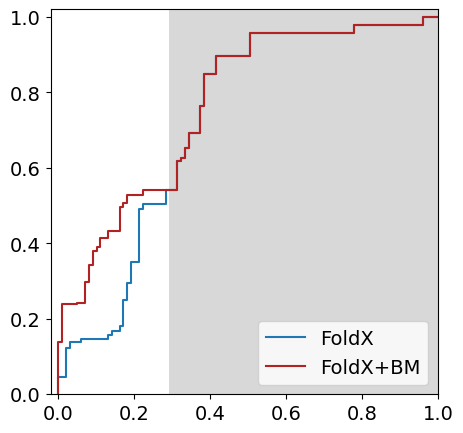

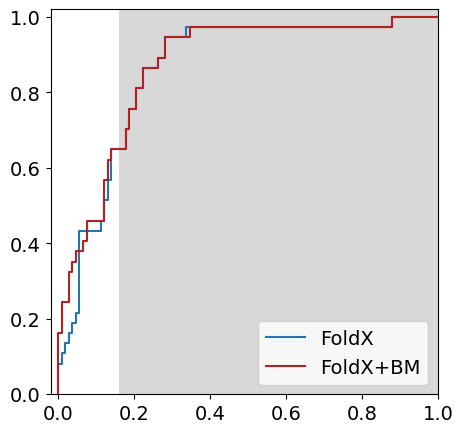

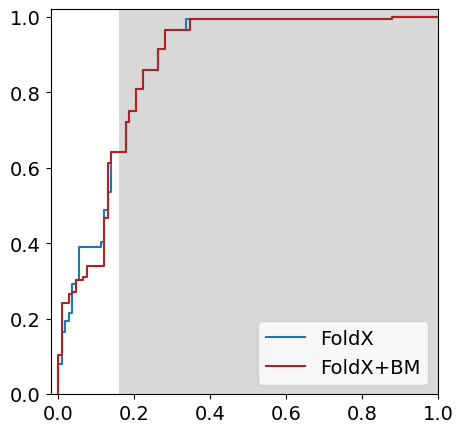

[0.83 0.86 0.73]
[0.85 0.87 0.76]


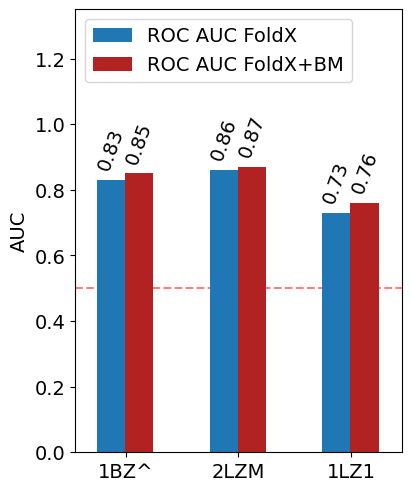

[0.88 0.87 0.72]
[0.91 0.87 0.77]


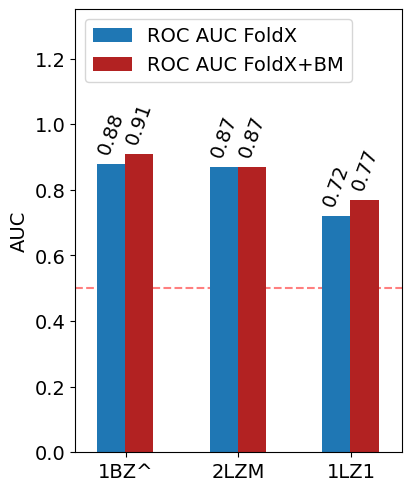

In [4]:
# figure 4: make (W)ROC cuves and calculate (W)AUC using FoldX as predictor

# load in data for proteins from T2837 set
t1bz6_data = pd.read_csv('./data/t1bz6_data.csv', index_col=0)
t1lz1_data = pd.read_csv('./data/t1lz1_data.csv', index_col=0)
t2lzm_data = pd.read_csv('./data/t2lzm_data.csv', index_col=0)

aucs_t1bz6 =  plot_roc_fullrange(t1bz6_data, name_out='./figures/fig_4-ROC-1bz6-foldx.png',
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])
waucs_t1bz6 = plot_roc_fullrange(t1bz6_data, name_out='./figures/fig_4-WROC-1bz6-foldx.png', scale=True,
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])
aucs_t1lz1 = plot_roc_fullrange(t1lz1_data, name_out='./figures/fig_4-ROC-1lz1-foldx.png',
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])
waucs_t1lz1 = plot_roc_fullrange(t1lz1_data, name_out='./figures/fig_4-WROC-1lz1-foldx.png', scale=True,
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])
aucs_2lzm = plot_roc_fullrange(t2lzm_data,name_out='./figures/fig_4-ROC-2lzm-foldx.png',
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])
waucs_2lzm = plot_roc_fullrange(t2lzm_data, name_out='./figures/fig_4-WROC-2lzm-foldx.png', scale=True,
                                 predictor='foldx_raw', predictor_scaled='foldx', 
                                 exclude=['SO', 'SO_raw'])


# make barplot of (W)AUC values using foldx as predictor
species = ['1BZ^', '2LZM', '1LZ1']
values_auc = {
    'ROC AUC FoldX': np.round([aucs_t1bz6[0], aucs_2lzm[0], aucs_t1lz1[0]], 2),
    'ROC AUC FoldX+BM': np.round([aucs_t1bz6[1], aucs_2lzm[1], aucs_t1lz1[1]], 2)}
values_wauc = {
    'ROC AUC FoldX': np.round([waucs_t1bz6[0], waucs_2lzm[0], waucs_t1lz1[0]], 2),
    'ROC AUC FoldX+BM': np.round([waucs_t1bz6[1], waucs_2lzm[1], waucs_t1lz1[1]], 2)}
colors = {'ROC AUC FoldX':'tab:blue', 'ROC AUC FoldX+BM':'firebrick'}

plot_bars(values_auc, species, colors, headspace=0.35, name_out='./figures/fig_4-bars-foldx-AUC.png')
plot_bars(values_wauc, species, colors, headspace=0.35, name_out='./figures/fig_4-bars-foldx-WAUC.png')

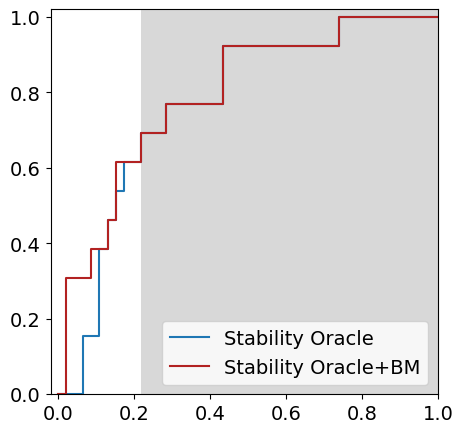

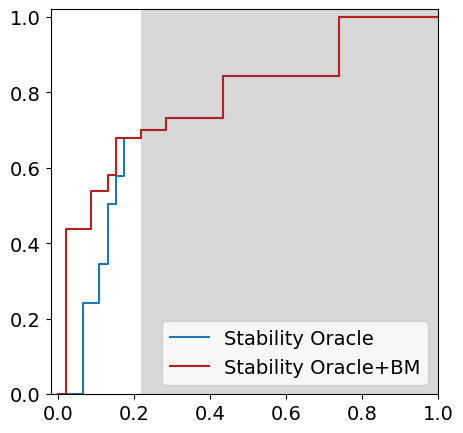

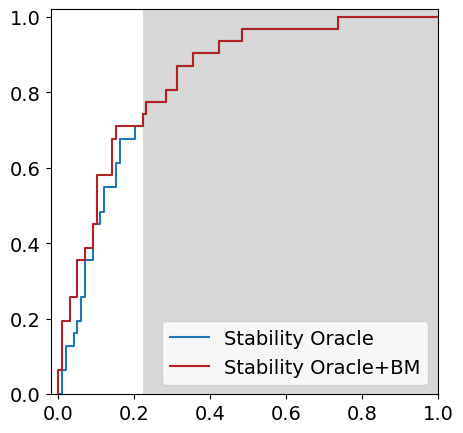

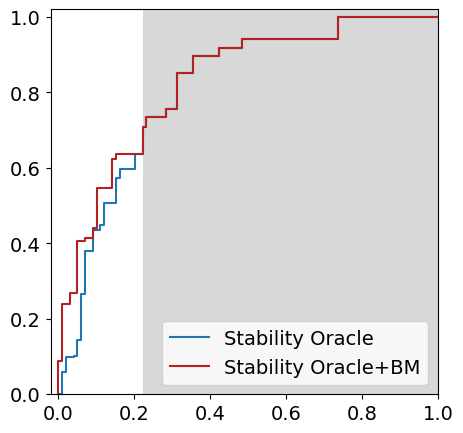

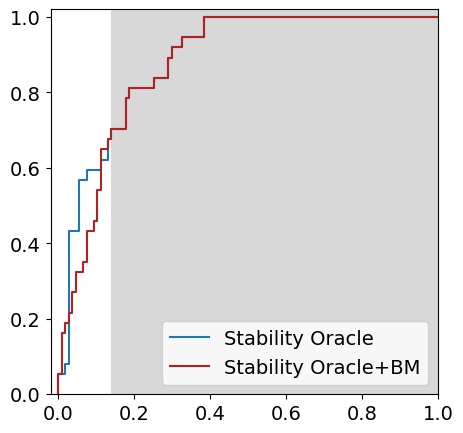

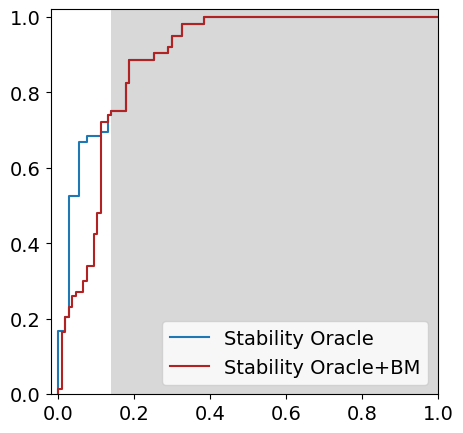

[0.77 0.89 0.83]
[0.79 0.88 0.84]


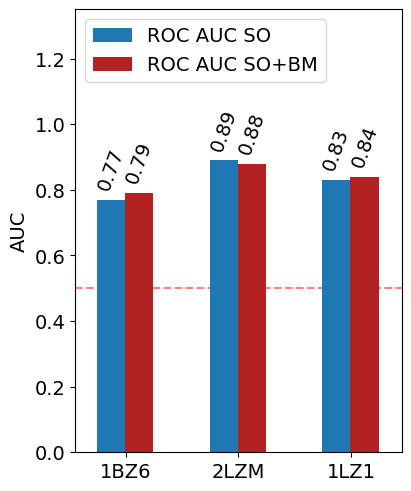

[0.75 0.91 0.81]
[0.78 0.89 0.83]


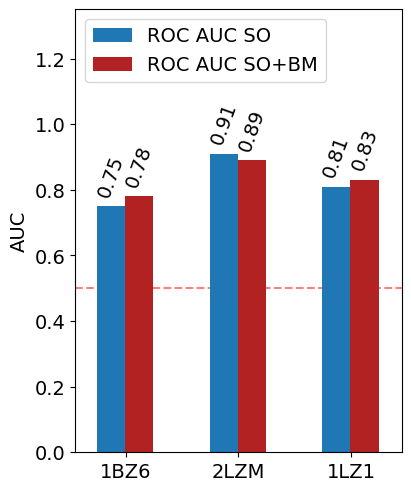

In [5]:
# figure 4: make (W)ROC cuves and calculate (W)AUC using Stability Oracle as predictor

# load in data for proteins from T2837 set
t1bz6_data = pd.read_csv('./data/t1bz6_data.csv', index_col=0)
t1lz1_data = pd.read_csv('./data/t1lz1_data.csv', index_col=0)
t2lzm_data = pd.read_csv('./data/t2lzm_data.csv', index_col=0)

aucs_t1bz6 =  plot_roc_fullrange(t1bz6_data, name_out='./figures/fig_4-ROC-1bz6-SO.png',
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])
waucs_t1bz6 = plot_roc_fullrange(t1bz6_data, name_out='./figures/fig_4-WROC-1bz6-SO.png', scale=True,
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])
aucs_t1lz1 = plot_roc_fullrange(t1lz1_data, name_out='./figures/fig_4-ROC-1lz1-SO.png',
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])
waucs_t1lz1 = plot_roc_fullrange(t1lz1_data, name_out='./figures/fig_4-WROC-1lz1-SO.png', scale=True,
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])
aucs_2lzm = plot_roc_fullrange(t2lzm_data,name_out='./figures/fig_4-ROC-2lzm-SO.png',
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])
waucs_2lzm = plot_roc_fullrange(t2lzm_data, name_out='./figures/fig_4-WROC-2lzm-SO.png', scale=True,
                                 predictor='SO_raw', predictor_scaled='SO', 
                                 exclude=['foldx', 'foldx_raw'])

# make barplot of (W)AUC values using Stability Oracle as predictor
species = ['1BZ6', '2LZM', '1LZ1']
values_auc = {
    'ROC AUC SO': np.round([aucs_t1bz6[0], aucs_2lzm[0], aucs_t1lz1[0]], 2),
    'ROC AUC SO+BM': np.round([aucs_t1bz6[1], aucs_2lzm[1], aucs_t1lz1[1]], 2)}
values_wauc = {
    'ROC AUC SO': np.round([waucs_t1bz6[0], waucs_2lzm[0], waucs_t1lz1[0]], 2),
    'ROC AUC SO+BM': np.round([waucs_t1bz6[1], waucs_2lzm[1], waucs_t1lz1[1]], 2)}
colors = {'ROC AUC SO':'tab:blue', 'ROC AUC SO+BM':'firebrick'}

plot_bars(values_auc, species, colors, headspace=0.35, name_out='./figures/fig_4-bars-SO-AUC.png')
plot_bars(values_wauc, species, colors, headspace=0.35, name_out='./figures/fig_4-bars-SO-WAUC.png')

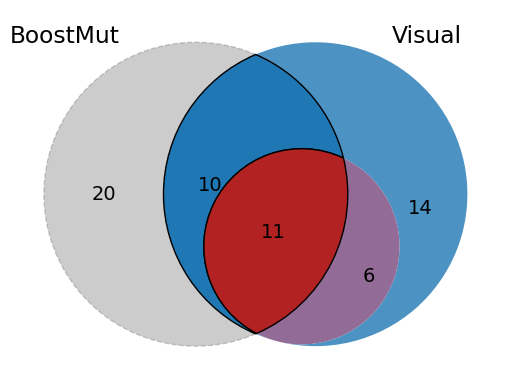

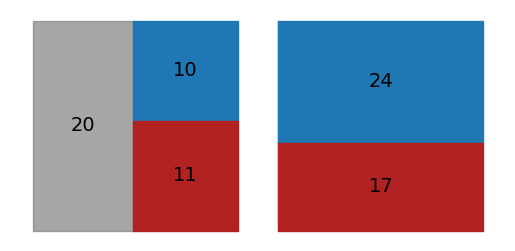

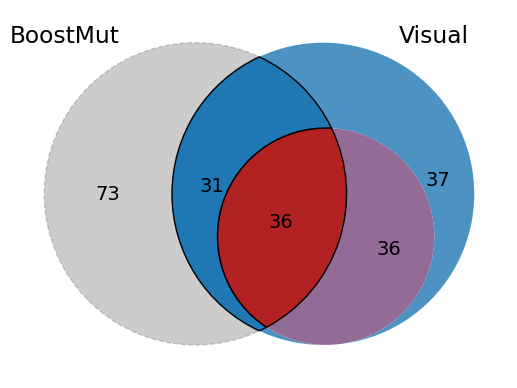

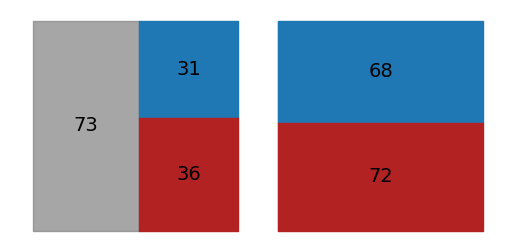

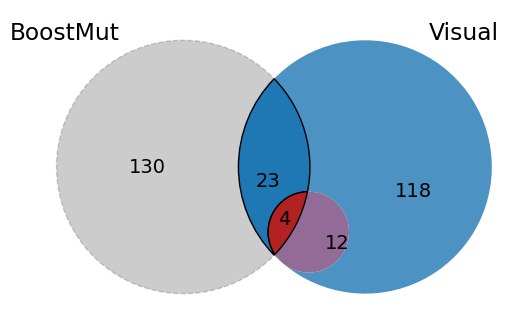

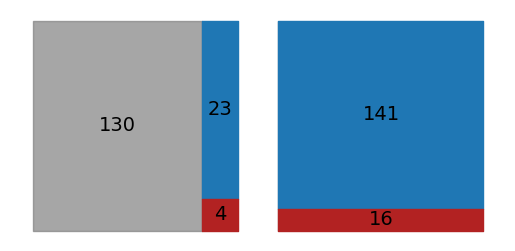

In [6]:
# figure 5: Venn diagrams for BoostMut vs visual inspection

# load in data for FRESCO proteins
leh_data = pd.read_csv('./data/leh_data.csv', index_col=0)
adh_data = pd.read_csv('./data/adh_data.csv', index_col=0)
hmfo_data = pd.read_csv('./data/hmfo_data.csv', index_col=0)

plot_venn(leh_data, name_out='./figures/fig_5-leh-venn.png')
plot_square(leh_data, name_out='./figures/fig_5-leh-square.png')

plot_venn(adh_data, name_out='./figures/fig_5-adh-venn.png')
plot_square(adh_data, name_out='./figures/fig_5-adh-square.png')

plot_venn(hmfo_data, name_out='./figures/fig_5-hmfo-venn.png')
plot_square(hmfo_data, name_out='./figures/fig_5-hmfo-square.png')

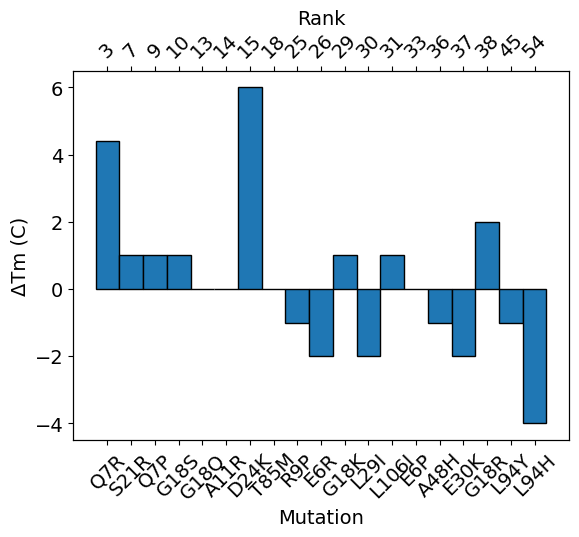

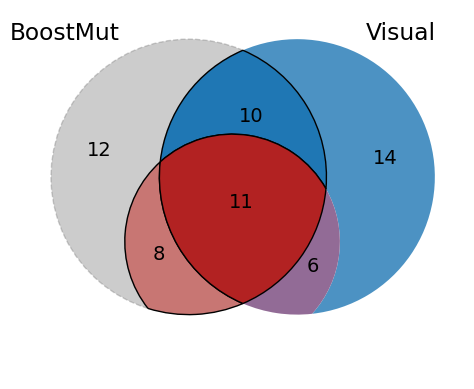

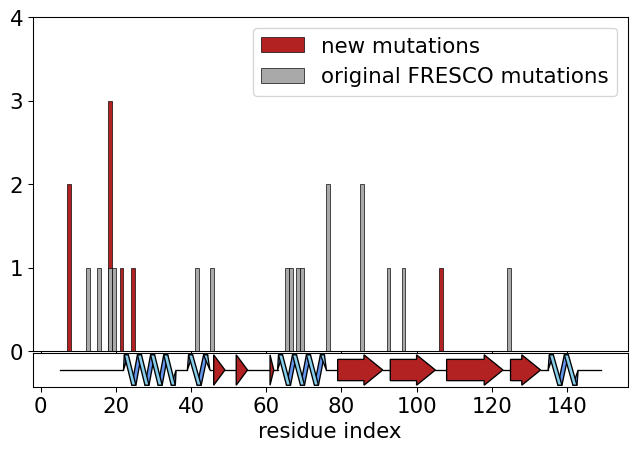

In [7]:
# figure 6

# load in data
leh_data = pd.read_csv('./data/leh_data.csv', index_col=0)
leh_data_newmuts = pd.read_csv('./data/leh_data_newmuts.csv', index_col=0)

# plot the barplot with ranked mutations
plot_new_tms(leh_data_newmuts, name_out='./figures/fig_5-leh-ranking-newmuts.png')

# the blue section within the BoostMut selected mutations has been edited in afterwards
leh_notstab_new= leh_data_newmuts[leh_data_newmuts.dTm <= 0].index
leh_stab_new = leh_data_newmuts[leh_data_newmuts.dTm > 0].index
plot_venn(leh_data, name_out='./figures/fig_5-leh-venn-newmuts.png', add_stab=leh_stab_new, updated=True)

# define the secondary structure for LEH
leh_secstr = 'LLLLLLLLLLLLLLLLLHHHHHHHHHHHHHHLLLHHHHHHL'\
             'SSSLLLSSSLLLLLLSLHHHHHHHHHHHHHLLLSSSSSSSSS'\
             'SSSLLSSSSSSSSSSSSLLLSSSSSSSSSSSSSSSLLSSSSSSSSLLHHHHHHHHLLLLLL'

# generate plot with distribution of mutations over sequence
res_leh_stab_old = [int(i[1:-1]) for i in leh_data[leh_data.stabilizing].index]
res_leh_stab_new = [int(i[1:-1]) for i in leh_stab_new]
plot_mut_distribution(5, leh_secstr, res_leh_stab_old, res_leh_stab_new, name_out='./figures/fig_5-leh-dist-newmuts.png')

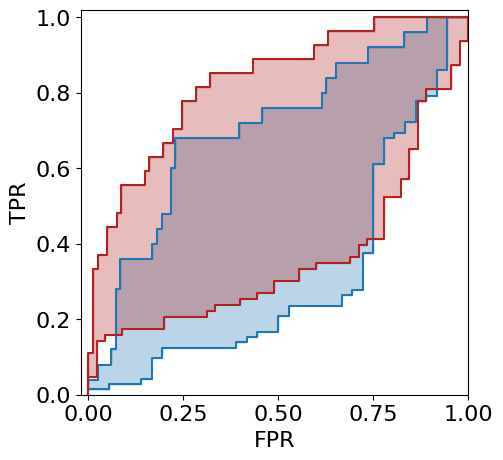

10


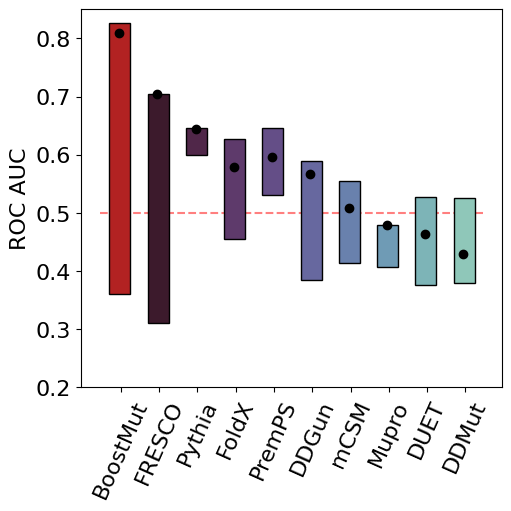

generating aucs for frac:  0.0
generating aucs for frac:  0.1
generating aucs for frac:  0.2
generating aucs for frac:  0.3
generating aucs for frac:  0.4
generating aucs for frac:  0.5
generating aucs for frac:  0.6
generating aucs for frac:  0.7
generating aucs for frac:  0.8
generating aucs for frac:  0.9
generating aucs for frac:  1.0


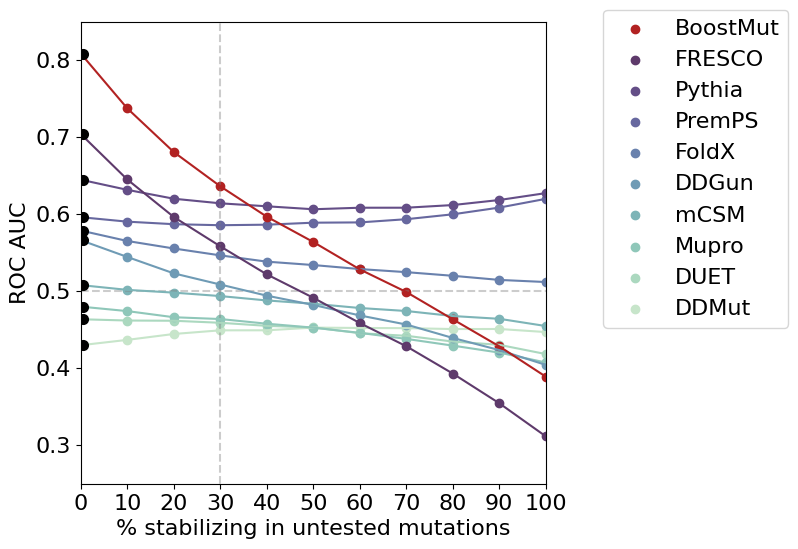

In [8]:
# figure 7

# load in data
leh_data = pd.read_csv('./data/leh_data.csv', index_col=0)
leh_data_newmuts = pd.read_csv('./data/leh_data_newmuts.csv', index_col=0)
benchstab_raw = pd.read_csv('./data/BenchStab_20241021_175816/results.csv')
leh_pythia = pd.read_csv('./data/leh_pythia.csv', index_col=0)
    
# get ranking for boostmut
boostmut_cols = [i for i in leh_data.columns if i not in ['exp_tested', 'stabilizing', 'dtm']]
leh_bm_ranking = leh_data[boostmut_cols].sum(axis=1).values

# as a score for FRESCO visual inspection, use foldx but add +100 to all mutations passing visual inspection and -100 to those rejected
leh_vis_ranking = leh_data.copy()
leh_vis_ranking.loc[leh_vis_ranking[leh_vis_ranking.exp_tested].index, 'foldx'] += 100
leh_vis_ranking.loc[leh_vis_ranking[~leh_vis_ranking.exp_tested].index, 'foldx'] -= 100
leh_vis_ranking = leh_vis_ranking.foldx.values

# prepare benchstab data, pythia data, foldx data
leh_benchstab = process_raw_benchstab(benchstab_raw, ['PremPS','DDGun','mCSM', 'Mupro','DUET', 'DDMut' ], leh_data.index)
leh_pythia = leh_pythia.loc[leh_data.index].ddg.values
leh_foldx = leh_data.foldx.values

# update stabilizing mutations with new stabilizing mutations
leh_stab_old = leh_data[leh_data.stabilizing].index
leh_stab_new = leh_data_newmuts[leh_data_newmuts.dTm > 0].index
leh_true = [(i in leh_stab_old or i in leh_stab_new ) for i in leh_data.index]

# get bool for if mutation is untested (including new mutations)
leh_unknown = [not (t or (ind in leh_data_newmuts.index)) for ind, t in zip(leh_data.index, leh_data.exp_tested)]

# plot the comparison between the visual inspection and BoostMut
plot_roc_ranges([leh_vis_ranking, leh_bm_ranking], leh_true, leh_unknown, ['tab:blue', 'firebrick'], name_out='./figures/fig_7-roc-ranges.png')

# plot best/worst case AUC ranges for BoostMut, visual inspection (FRESCO) and various other predictors
predictors = ["BoostMut", "FRESCO", "Pythia", "FoldX",'PremPS','DDGun','mCSM', 'Mupro','DUET', 'DDMut' ]
pred_values = [leh_bm_ranking, leh_vis_ranking, -leh_pythia, leh_foldx]+ list(-leh_benchstab.values.T)
plot_auc_ranges(predictors, pred_values, leh_true, leh_unknown, name_out='./figures/fig_7-auc-ranges.png')

# plot AUC values for varying % of stabilizing mutations in unknown fraction
all_auc_preds = calc_frac_unknown(pred_values, leh_true, leh_unknown)
plot_auc_ranges_frac(all_auc_preds, predictors, name_out='./figures/fig_7-auc-range-frac.png')